In [2]:
import numpy as np
import pandas as pd
import os 
import glob 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import scipy
import csv

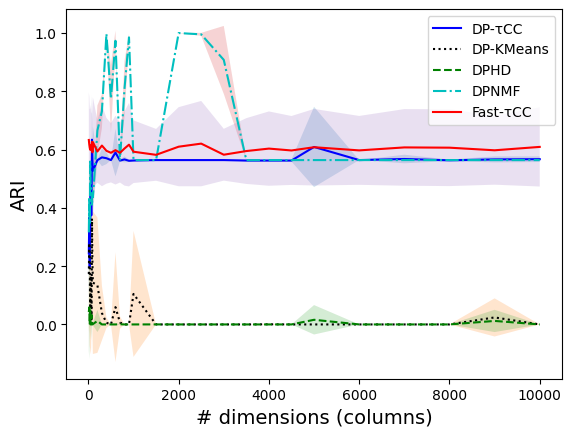

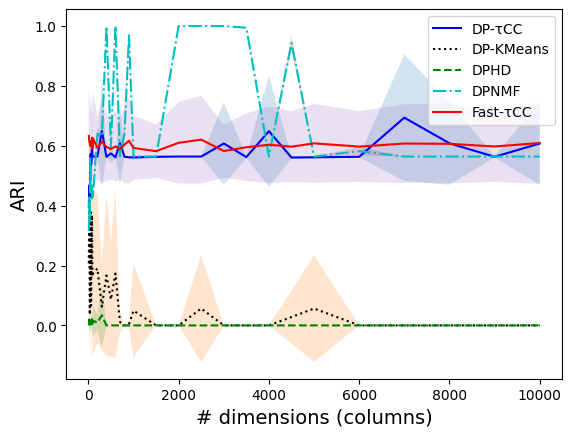

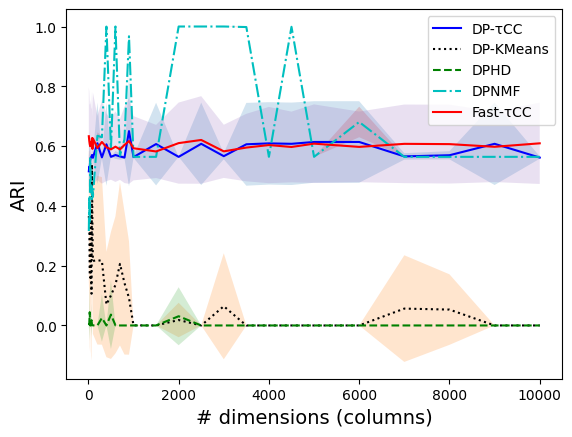

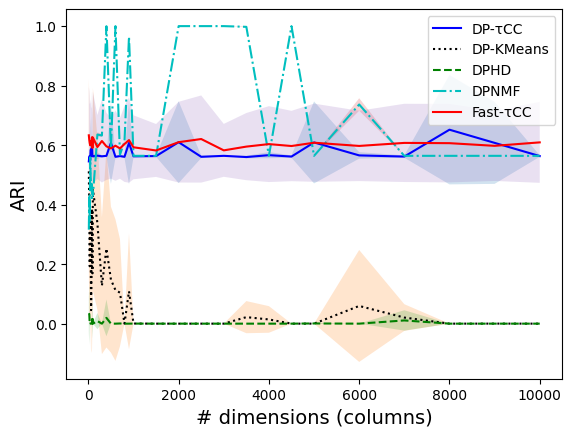

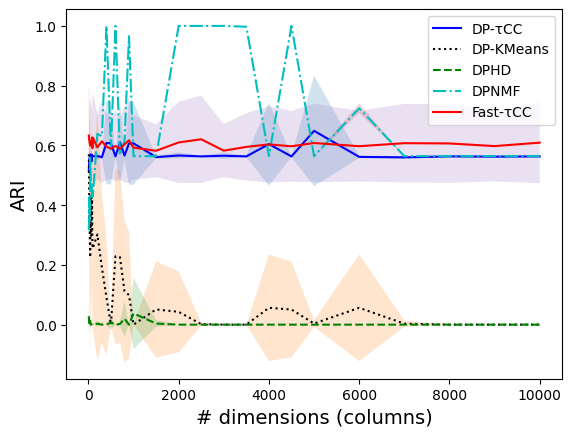

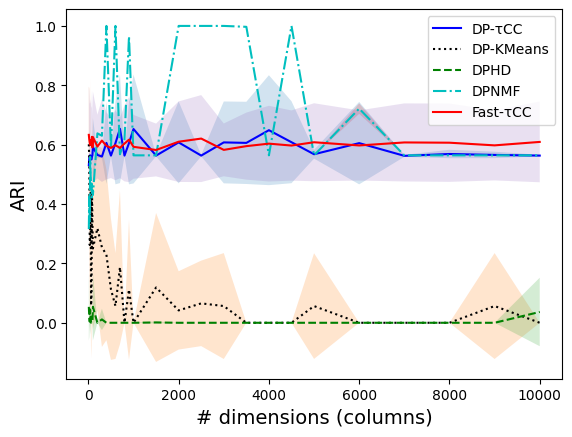

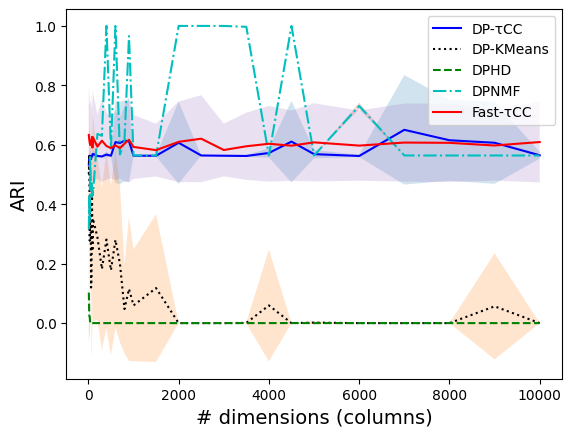

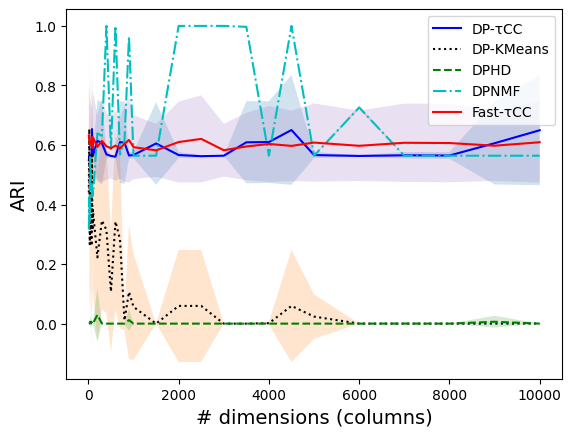

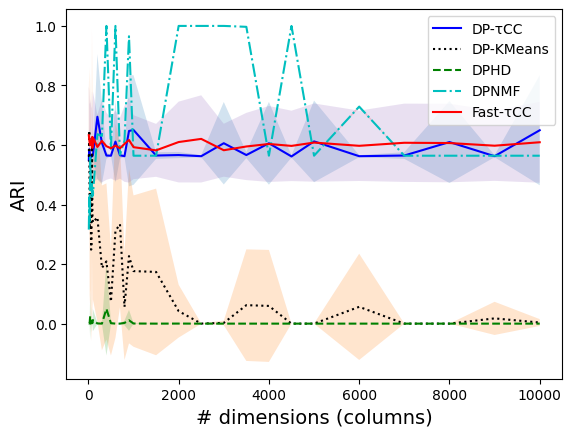

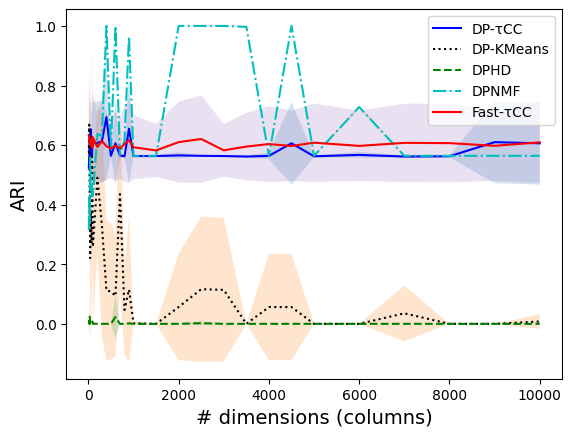

In [3]:
dimensions = [(1000,10),(1000,20),(1000,30),(1000,40),(1000,50),(1000,60),(1000,70),(1000,80),(1000,90),(1000,100),(1000,200),(1000,300),(1000,400),(1000,500),(1000,600),(1000,700),(1000,800),(1000,900),(1000,1000),(1000,1500),(1000,2000),(1000,2500),(1000,3000),(1000,3500),(1000,4000),(1000,4500),(1000,5000),(1000,6000),(1000,7000),(1000,8000),(1000,9000),(1000,10000)]

nclus = [(3,3)]
noise_list = [3]
eps_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99999]

n_iterations = 4

for selected_model in eps_list:
    dimy = []
    dptaucc_ari_x = []
    dptaucc_ari_y = []
    dpkm_ari_x = []
    dpkm_ari_y = []
    dpkm_ex_time = []
    dpnmf_ari_x = []
    dpnmf_ari_y = []
    dphd_ari_x = []
    dphd_ari_y = []
    dptaucc_ari_x_std = []
    dptaucc_ari_y_std = []
    dpkm_ari_x_std = []
    dpkm_ari_y_std = []
    dpnmf_ari_x_std = []
    dpnmf_ari_y_std = []
    dphd_ari_x_std = []
    dphd_ari_y_std = []
    taucc_ari_x = []
    taucc_ari_y = []
    taucc_ari_x_std = []
    taucc_ari_y_std = []
    for dim in dimensions:
        for nc in nclus:
            for noise in noise_list:
                path = os.getcwd()
                path=os.path.join(path,"output/dptaucc")
                f1=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_dim_{n_iterations}_results.csv")
                path = os.getcwd()
                path=os.path.join(path,"output/taucc")
                f2=os.path.join(path,f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_dim_results.csv")
                path = os.getcwd()
                path=os.path.join(path,"output/dpkm")
                f3=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_dim_results.csv")
                path = os.getcwd()
                path=os.path.join(path,"output/dphd")
                f4=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_dim_{n_iterations}_results.csv")
                path = os.getcwd()
                path=os.path.join(path,"output/dpnmf")
                f5=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_dim_{n_iterations}_results.csv")
                data_cc = pd.read_csv(f1)
                data_cc_means = data_cc.groupby(['model'], as_index=False).mean()
                data_cc_std = data_cc.groupby(['model'], as_index=False).std()
                data_cc3 = pd.read_csv(f3)
                data_cc3_means = data_cc3.groupby(['model'], as_index=False).mean()
                data_cc3_std = data_cc3.groupby(['model'], as_index=False).std()
                data_cc4 = pd.read_csv(f4).drop(columns=['sse'])
                data_cc4_means = data_cc4.groupby(['model'], as_index=False).mean()
                data_cc4_std = data_cc4.groupby(['model'], as_index=False).std()
                data_cc5 = pd.read_csv(f5)
                data_cc5_means = data_cc5.groupby(['model'], as_index=False).mean()
                data_cc5_std = data_cc5.groupby(['model'], as_index=False).std()
                data_cc1 = pd.read_csv(f2)
                ccari_x = data_cc1["ari_x"].mean()
                ccari_x_std = data_cc1["ari_x"].std()
                ccari_y = data_cc1["ari_y"].mean()
                ccari_y_std = data_cc1["ari_y"].std()
                ccex_time = data_cc1["execution_time"].mean()
                ccex_time_std = data_cc1["execution_time"].std()
                taucc_ari_x.append(ccari_x)
                taucc_ari_y.append(ccari_y)
                taucc_ari_x_std.append(ccari_x_std)
                taucc_ari_y_std.append(ccari_y_std)
                dimy.append(data_cc_means[data_cc_means['model']==selected_model]['dim_y'])
                dptaucc_ari_x.append(data_cc_means[data_cc_means['model']==selected_model]['ari_x'])
                dptaucc_ari_y.append(data_cc_means[data_cc_means['model']==selected_model]['ari_y'])
                dpkm_ari_x.append(data_cc3_means[data_cc3_means['model']==selected_model]['ari_x'])
                dpkm_ex_time.append(data_cc3_means[data_cc3_means['model']==selected_model]['exec_time'])
                dphd_ari_x.append(data_cc4_means[data_cc4_means['model']==selected_model]['ari_x'])
                dpnmf_ari_x.append(data_cc5_means[data_cc5_means['model']==selected_model]['ari_xc'])
                dptaucc_ari_x_std.append(data_cc_std[data_cc_std['model']==selected_model]['ari_x'])
                dptaucc_ari_y_std.append(data_cc_std[data_cc_std['model']==selected_model]['ari_y'])
                dpkm_ari_x_std.append(data_cc3_std[data_cc3_std['model']==selected_model]['ari_x'])
                dphd_ari_x_std.append(data_cc4_std[data_cc4_std['model']==selected_model]['ari_x'])
                dpnmf_ari_x_std.append(data_cc5_std[data_cc5_std['model']==selected_model]['ari_xc'])


    plt.plot(dimy, dptaucc_ari_x, "-b", label="DP-\u03C4CC")
    plt.fill_between(np.array(dimy)[:,0], np.array(dptaucc_ari_x, dtype=float)[:,0]-np.array(dptaucc_ari_x_std, dtype=float)[:,0], np.array(dptaucc_ari_x, dtype=float)[:,0]+np.array(dptaucc_ari_x_std, dtype=float)[:,0], alpha=0.2)
    plt.plot(dimy, dpkm_ari_x, ":k", label="DP-KMeans")
    plt.fill_between(np.array(dimy)[:,0], np.array(dpkm_ari_x)[:,0]-np.array(dpkm_ari_x_std)[:,0], np.array(dpkm_ari_x)[:,0]+np.array(dpkm_ari_x_std)[:,0], alpha=0.2)
    plt.plot(dimy, dphd_ari_x, "--g", label="DPHD")
    plt.fill_between(np.array(dimy)[:,0], np.array(dphd_ari_x)[:,0]-np.array(dphd_ari_x_std)[:,0], np.array(dphd_ari_x)[:,0]+np.array(dphd_ari_x_std)[:,0], alpha=0.2)
    plt.plot(dimy, dpnmf_ari_x, "-.c", label="DPNMF")
    plt.fill_between(np.array(dimy)[:,0], np.array(dpnmf_ari_x)[:,0]-np.array(dpnmf_ari_x_std)[:,0], np.array(dpnmf_ari_x)[:,0]+np.array(dpnmf_ari_x_std)[:,0], alpha=0.2)
    plt.plot(dimy, taucc_ari_x, '-r', label='Fast-\u03C4CC')
    plt.fill_between(np.array(dimy)[:,0], np.array(taucc_ari_x)-np.array(taucc_ari_x_std), np.array(taucc_ari_x)+np.array(taucc_ari_x_std), alpha=0.2)
    plt.legend(loc="best")
    plt.xlabel('# dimensions (columns)', fontsize=14)
    plt.ylabel('ARI', fontsize=14)
    plt.show()


(1000, 10)


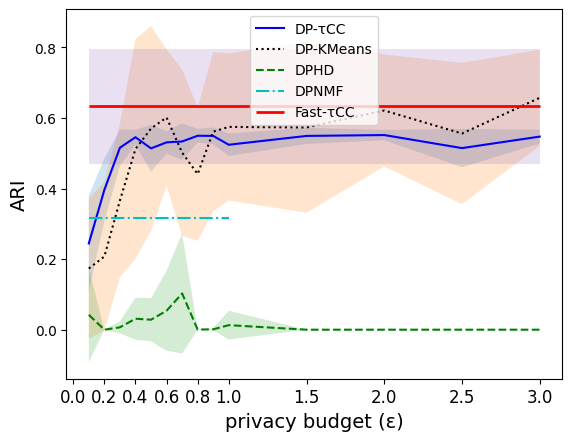

(1000, 20)


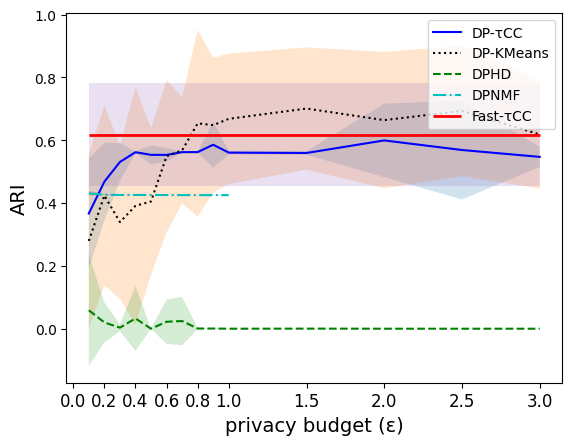

(1000, 30)


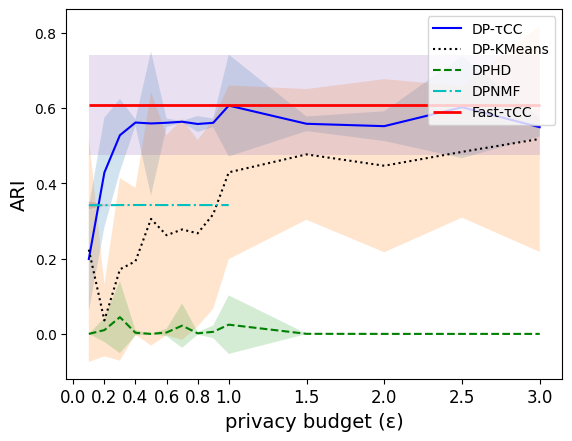

(1000, 40)


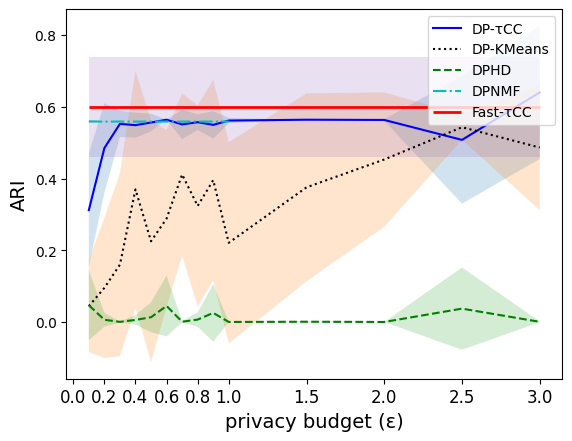

(1000, 50)


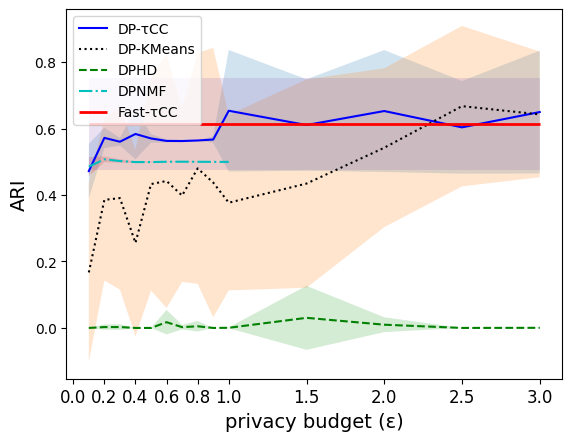

(1000, 60)


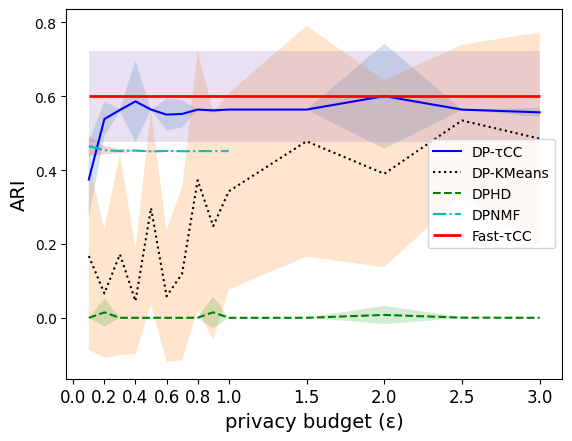

(1000, 70)


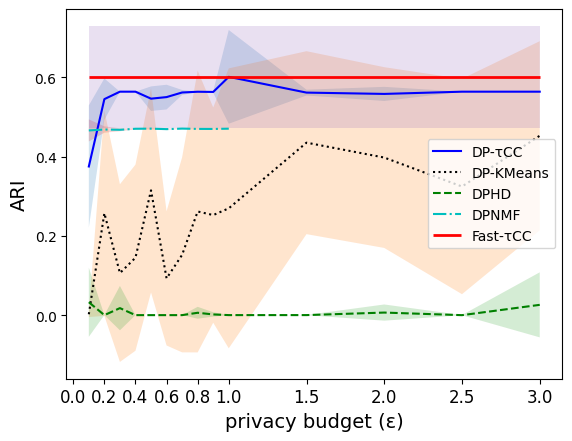

(1000, 80)


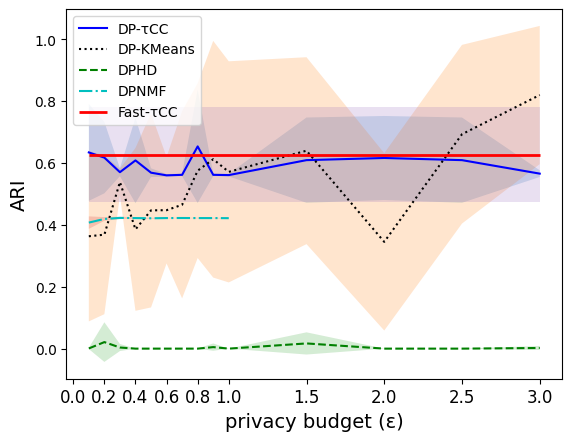

(1000, 90)


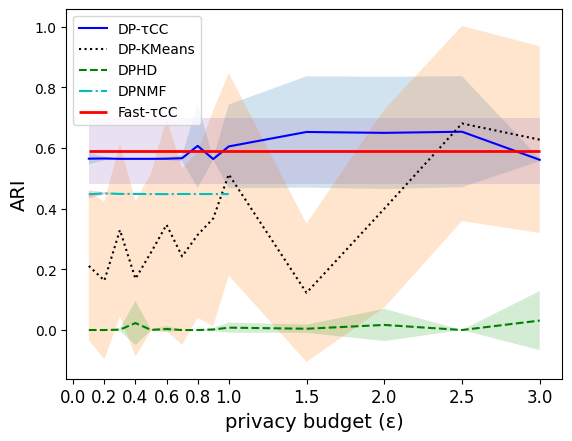

(1000, 100)


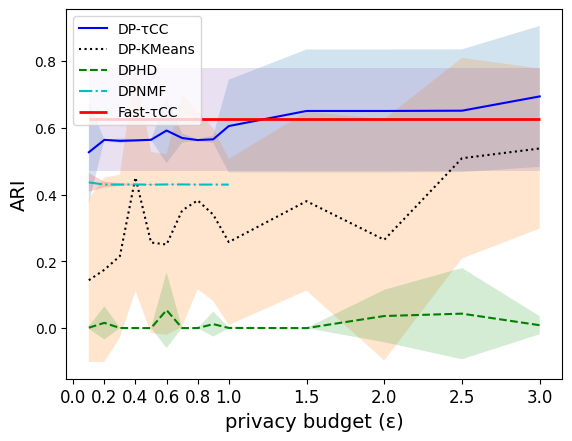

(1000, 200)


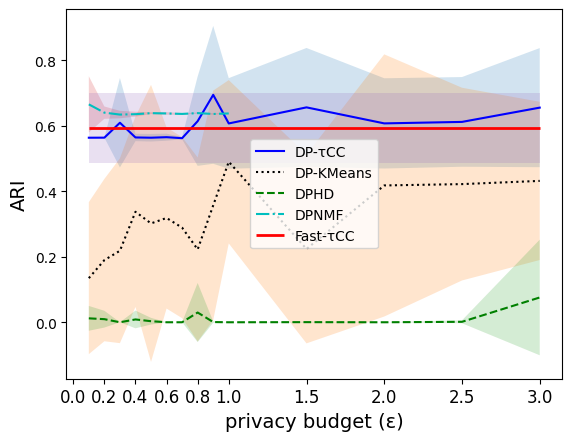

(1000, 300)


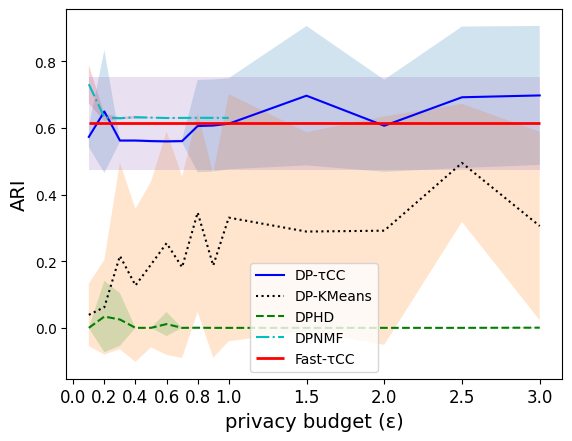

(1000, 400)


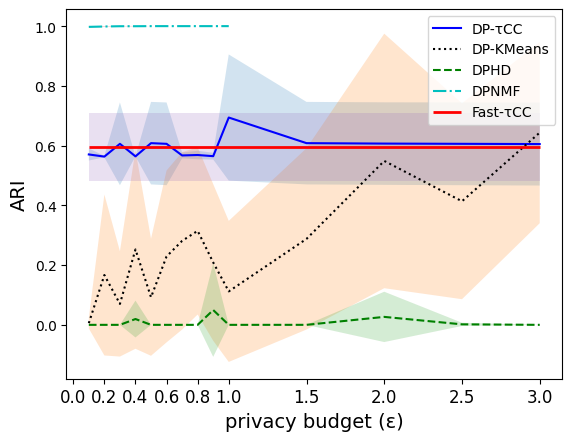

(1000, 500)


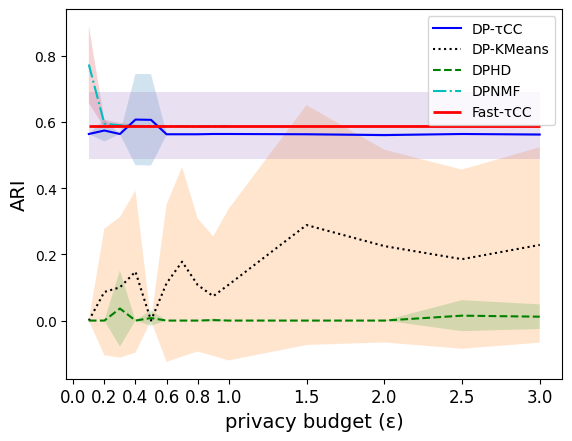

(1000, 600)


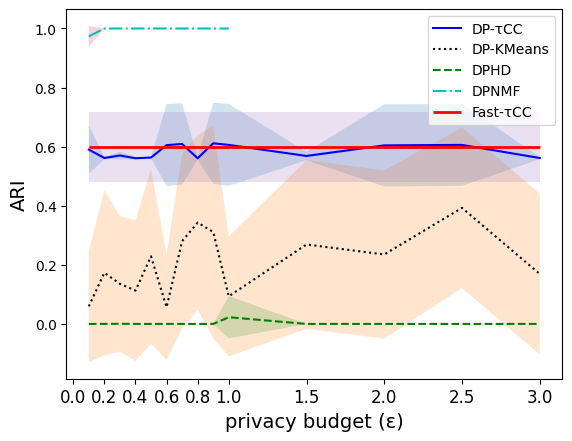

(1000, 700)


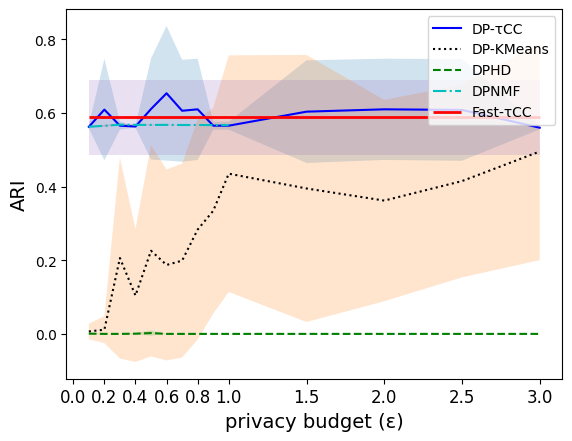

(1000, 800)


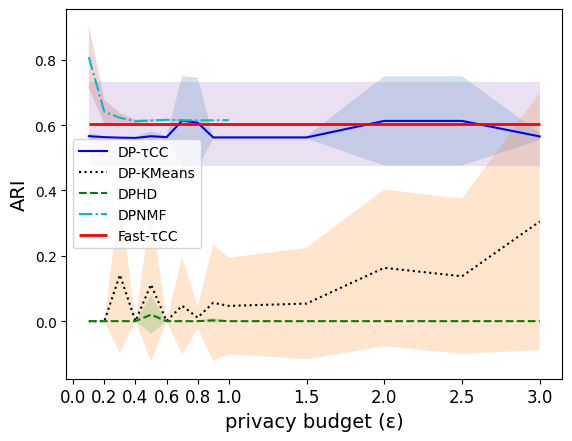

(1000, 900)


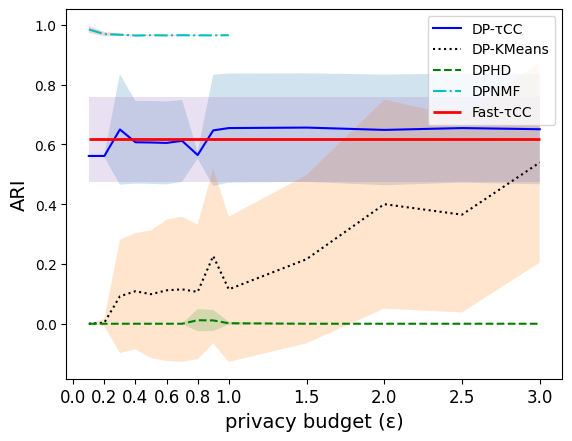

(1000, 1000)


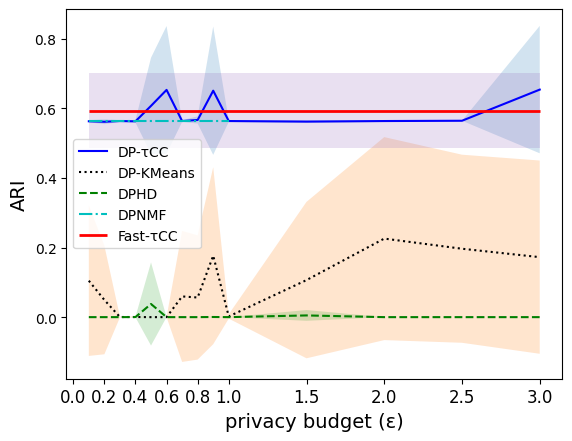

(1000, 1500)


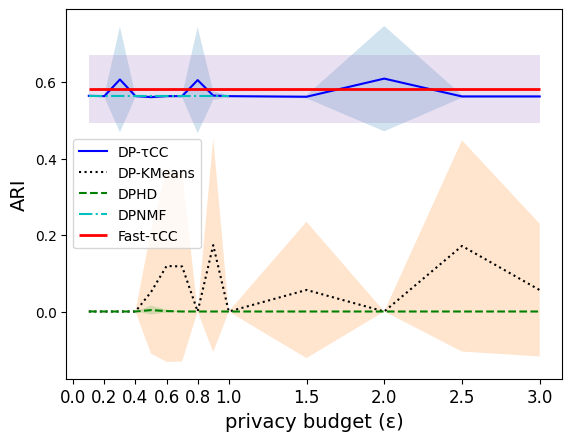

(1000, 2000)


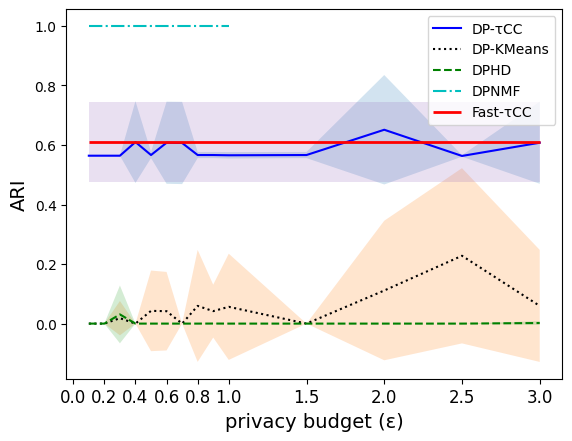

(1000, 2500)


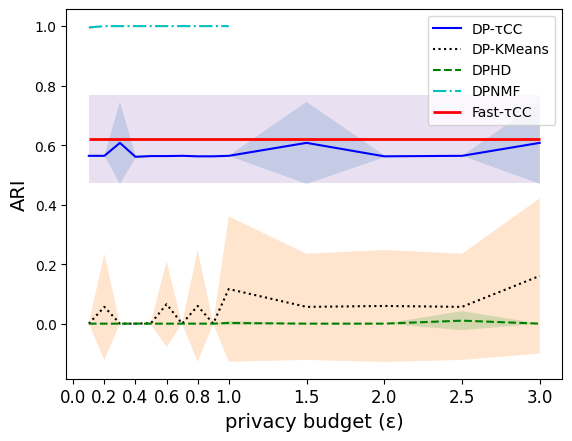

(1000, 3000)


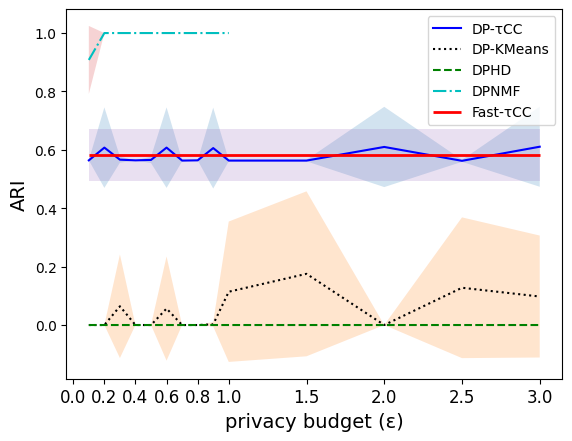

(1000, 3500)


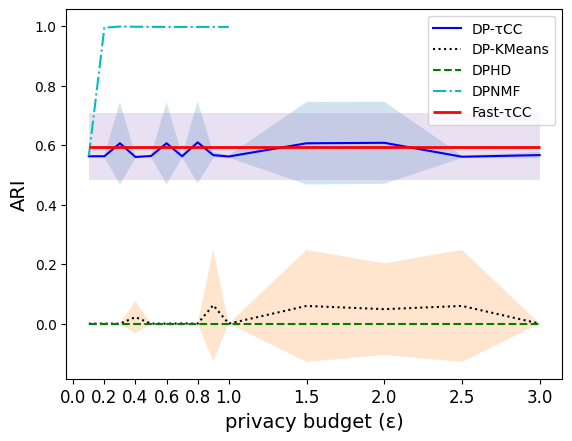

(1000, 4000)


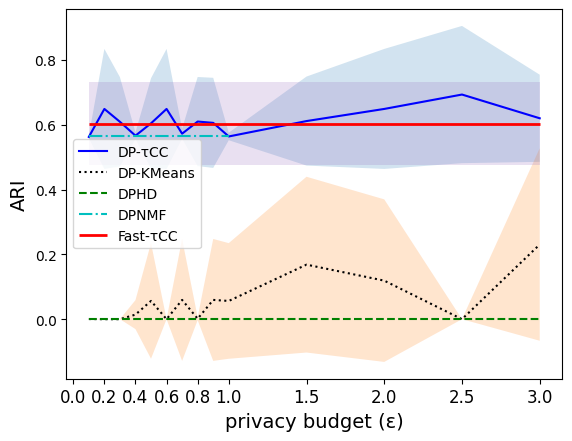

(1000, 4500)


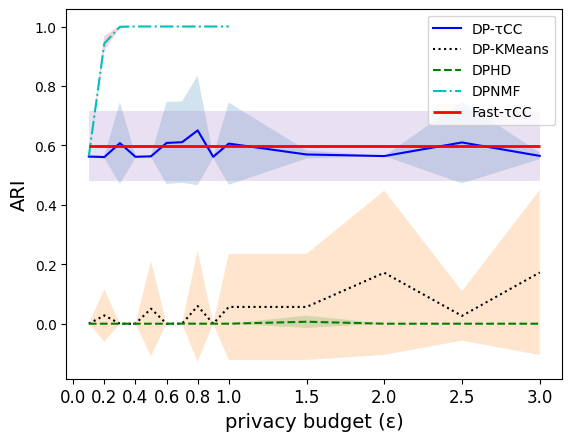

(1000, 5000)


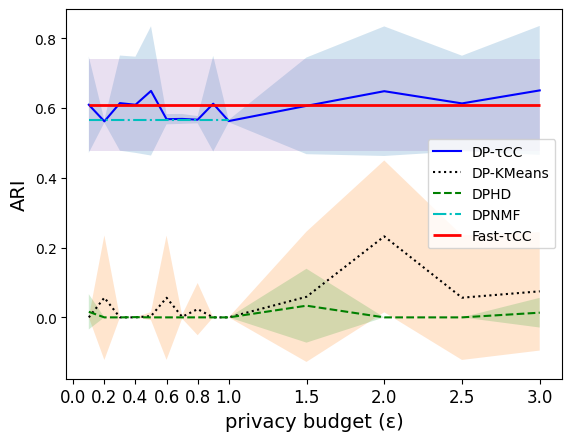

(1000, 6000)


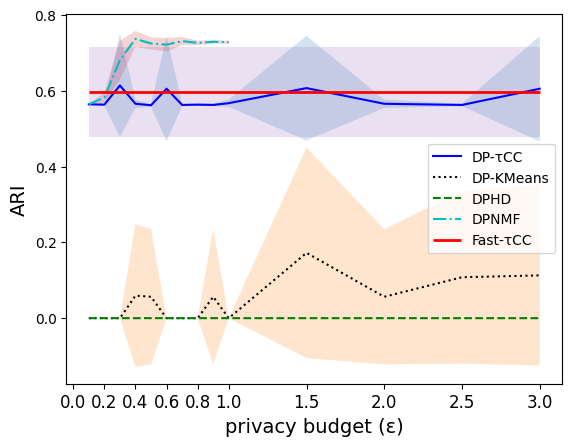

(1000, 7000)


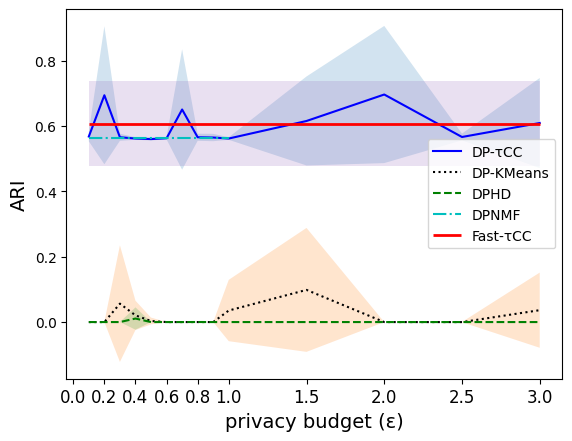

(1000, 8000)


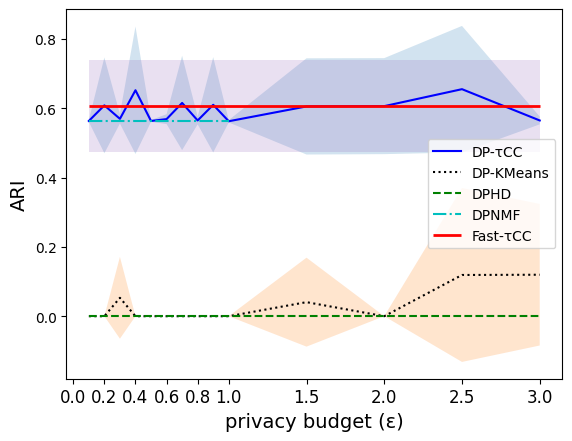

(1000, 9000)


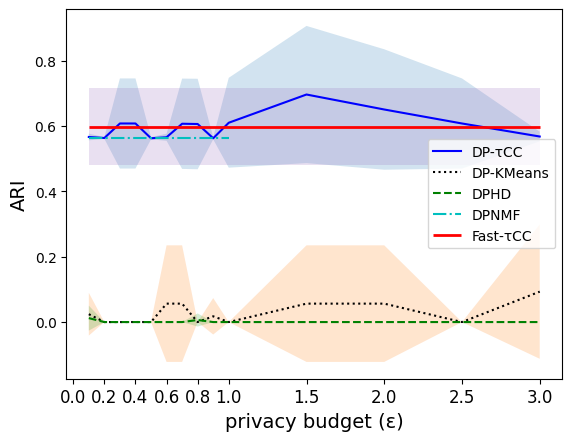

(1000, 10000)


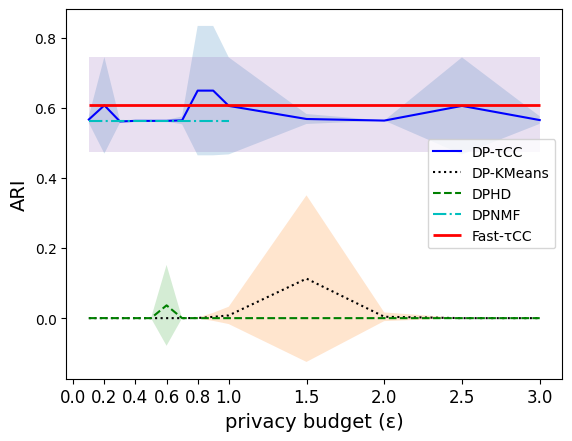

In [4]:
dimensions = [(1000,10),(1000,20),(1000,30),(1000,40),(1000,50),(1000,60),(1000,70),(1000,80),(1000,90),(1000,100),(1000,200),(1000,300),(1000,400),(1000,500),(1000,600),(1000,700),(1000,800),(1000,900),(1000,1000),(1000,1500),(1000,2000),(1000,2500),(1000,3000),(1000,3500),(1000,4000),(1000,4500),(1000,5000),(1000,6000),(1000,7000),(1000,8000),(1000,9000),(1000,10000)]

nclus = [(3,3)]
noise_list = [3]
eps_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99999]

n_iterations=4

selected_model = 0.99999

for dim in dimensions:
    for nc in nclus:
        for noise in noise_list:
            print(dim)
            path = os.getcwd()
            path=os.path.join(path,"output/dptaucc")
            f1=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_dim_{n_iterations}_results.csv")
            path = os.getcwd()
            path=os.path.join(path,"output/taucc")
            f2=os.path.join(path,f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_dim_results.csv")
            path = os.getcwd()
            path=os.path.join(path,"output/dpkm")
            f3=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_dim_results.csv")
            path = os.getcwd()
            path=os.path.join(path,"output/dphd")
            f4=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_dim_{n_iterations}_results.csv")
            path = os.getcwd()
            path=os.path.join(path,"output/dpnmf")
            f5=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_dim_{n_iterations}_results.csv")
            data_cc = pd.read_csv(f1)
            data_cc_means = data_cc.groupby(['model'], as_index=False).mean()
            data_cc_std = data_cc.groupby(['model'], as_index=False).std()
            data_cc3 = pd.read_csv(f3)
            data_cc3_means = data_cc3.groupby(['model'], as_index=False).mean()
            data_cc3_std = data_cc3.groupby(['model'], as_index=False).std()
            data_cc4 = pd.read_csv(f4).drop(columns=['sse'])
            data_cc4_means = data_cc4.groupby(['model'], as_index=False).mean()
            data_cc4_std = data_cc4.groupby(['model'], as_index=False).std()
            data_cc5 = pd.read_csv(f5)
            data_cc5_means = data_cc5.groupby(['model'], as_index=False).mean()
            data_cc5_std = data_cc5.groupby(['model'], as_index=False).std()
            data_cc1 = pd.read_csv(f2)
            ccari_x = data_cc1["ari_x"].mean()
            ccari_x_std = data_cc1["ari_x"].std()
            ccari_y = data_cc1["ari_y"].mean()
            ccari_y_std = data_cc1["ari_y"].std()
            ccex_time = data_cc1["execution_time"].mean()
            ccex_time_std = data_cc1["execution_time"].std()

            plt.plot(data_cc_means["model"], data_cc_means["ari_x"], "-b", label="DP-\u03C4CC")
            plt.fill_between(data_cc_means["model"], data_cc_means["ari_x"]-data_cc_std["ari_x"], data_cc_means["ari_x"]+data_cc_std["ari_x"], alpha=0.2)
            plt.plot(data_cc3_means["model"], data_cc3_means["ari_x"], ":k", label="DP-KMeans")
            plt.fill_between(data_cc3_means["model"], data_cc3_means["ari_x"]-data_cc3_std["ari_x"], data_cc3_means["ari_x"]+data_cc3_std["ari_x"], alpha=0.2)
            plt.plot(data_cc4_means["model"], data_cc4_means["ari_x"], "--g", label="DPHD")
            plt.fill_between(data_cc4_means["model"], data_cc4_means["ari_x"]-data_cc4_std["ari_x"], data_cc4_means["ari_x"]+data_cc4_std["ari_x"], alpha=0.2)
            plt.plot(data_cc5_means["model"], data_cc5_means["ari_xc"], "-.c", label="DPNMF")
            plt.fill_between(data_cc5_means["model"], data_cc5_means["ari_xc"]-data_cc5_std["ari_xc"], data_cc5_means["ari_xc"]+data_cc5_std["ari_xc"], alpha=0.2)

            plt.hlines(y=ccari_x, xmin=0.1, xmax=3, linewidth=2, color='r', label='Fast-\u03C4CC')
            plt.fill_between(data_cc_means["model"], ccari_x-ccari_x_std, ccari_x+ccari_x_std, alpha=0.2)
            plt.xticks([0,0.2,0.4,0.6,0.8,1.0,1.5,2.0,2.5,3.0], fontsize=12)            
            plt.legend(loc="best")
            plt.xlabel('privacy budget (\u03b5)', fontsize=14)
            plt.ylabel('ARI', fontsize=14)
            plt.show()
